<a href="https://colab.research.google.com/github/dr-song-summer-project/AI/blob/main/Clustering/%EB%AA%A8%EB%8D%B8%EB%A7%81_%EA%B2%B0%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stricky.tistory.com/124

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clustering_num = 24
similarity_cmp = 'reviewRate'

In [ ]:
# 학습용 데이터셋 불러오기. --- 긍 부정
import pandas as pd

# 문장 내용과 모델링 결과 하나로 합치기
document_df = pd.read_csv('/content/drive/My Drive/닥터송 여름 프로젝트/4. 대-스타 해결 2/DRSONG_AI_project/AI/data/test_results.tsv', delimiter='\t', header=0)
modeling_result = pd.read_csv('/content/drive/My Drive/닥터송 여름 프로젝트/4. 대-스타 해결 2/DRSONG_AI_project/AI/data/TrainData/13400/test_data_13400.txt', delimiter='\t', header=0)
modeling_result.drop(['encodedSenderId', 'encodedTargetId', 'DateTime'], axis=1, inplace=True)
modeling_result = modeling_result.drop([modeling_result.index[0]])
print(modeling_result.shape, document_df.shape) # (13282, 3) (13282, 3)로 동일
modeling_result['Negative'] = document_df['0']
modeling_result['Positive'] = document_df['1']

modeling_result['Sentiment'] = document_df['1'].sub(0.5, fill_value = 0)
modeling_result['Sentiment'] = modeling_result['Sentiment'].mul(2, fill_value = 0)

modeling_result['reviewType'].replace(['recruitReview', 'interviewReview', 'failureReveiw'],[0, 1, 2])

modeling_result.head()

,reviewIndex,reviewContent,reviewRate,reviewType
0,9052,지원 신청을 했고 연락이 닿아서 면접 날짜를 잡았는데 면접 보는 당일 아침에 상을 ...,1,failureReview
1,13275,활동 일 전날인데 연락이 오지 않았습니다. 무슨 사정이 생기셨나 봐요 ㅠㅠ 가까이 ...,5,failureReview
2,2487,예쁜 아가와 배려심 깊은 부모님 덕에 편안하게 아기를 돌볼 수 있어 감사했습니다,5,recruitReview
3,1965,제가 원하는 요일과 시간을 말했는데 다행히 다 가능하시다 하셔서 우리 아가를 돌보아...,4,recruitReview
4,1483,활동적이고 친화력이 좋은 아이였어요 말을 잘해서 요구 사항을 잘 알 수 있어요 어머...,4,recruitReview


리뷰 타입 모델링 결과 시각화

In [ ]:
# 학습용 데이터셋 불러오기 ----- 리뷰 타입
import pandas as pd

# 문장 내용과 모델링 결과 하나로 합치기

modeling_result = pd.read_csv('/content/drive/My Drive/닥터송 여름 프로젝트/4. 대-스타 해결 2/DRSONG_AI_project/AI/data/test_results.tsv', delimiter='\t', header=0)
# modeling_result = pd.read_csv('/content/drive/My Drive/닥터송 여름 프로젝트/4. 대-스타 해결 2/DRSONG_AI_project/AI/data/TrainData/13400/test_data_13400.txt', delimiter='\t', header=0)

# modeling_result.drop(['encodedSenderId', 'encodedTargetId', 'DateTime'], axis=1, inplace=True)
# modeling_result = modeling_result.drop([modeling_result.index[0]])
# print(modeling_result.shape, document_df.shape) # (13282, 3) (13282, 3)로 동일

# modeling_result['Sentiment'] = document_df['1'].sub(0.5, fill_value = 0)
# modeling_result['Sentiment'] = modeling_result['Sentiment'].mul(2, fill_value = 0)

# modeling_result['reviewType'].replace(['recruitReview', 'interviewReview', 'failureReveiw'],[0, 1, 2])

# label_dict = {'interviewReview': 0, 'failureReview': 1, 'recruitReview': 2}
# labels = []
# for x in modeling_result['reviewType']:
#   labels.append(label_dict[x])

# modeling_result['reviewType'] = labels

modeling_result.head()

,reviewIndex,interviewReview,failureReview,recruitReview
0,9052,0.669962,0.299437,0.030601
1,13275,0.060239,0.924386,0.015374
2,2487,0.008271,0.003310,0.988419
3,1965,0.056695,0.008091,0.935214
4,1483,0.008745,0.003347,0.987909


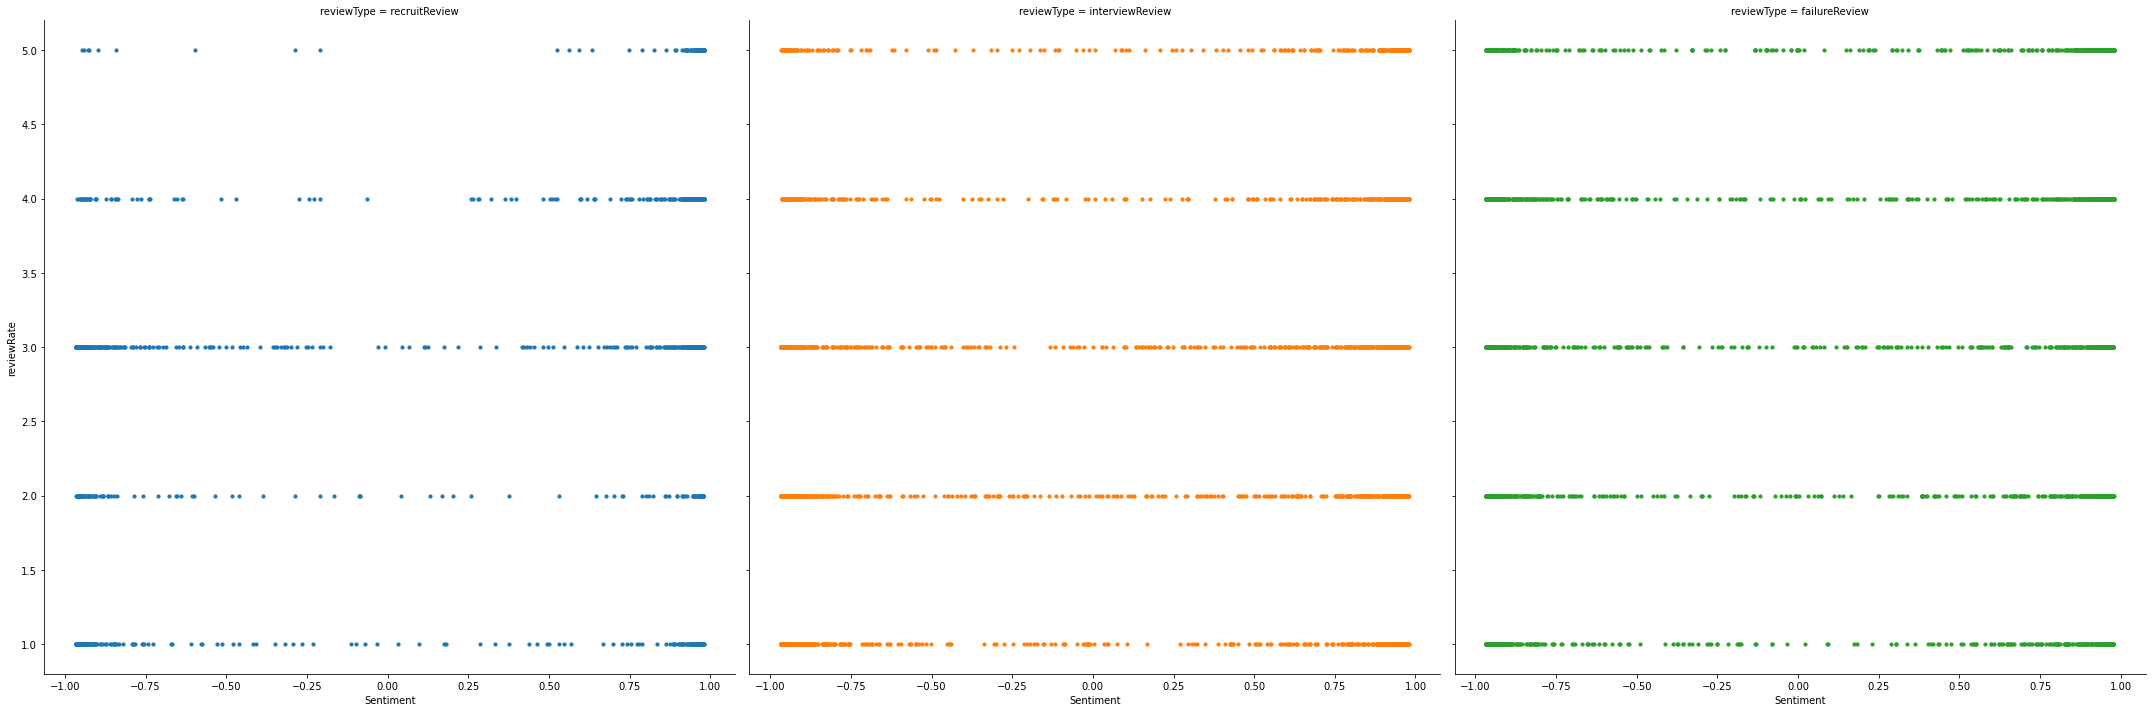

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sb.lmplot(x='Sentiment', y='reviewRate', data=modeling_result, height=10, fit_reg=False, scatter_kws={"s":10, "alpha":1}, hue='reviewType', col='reviewType', ci=10)

# plt.title('modeling result')